In [27]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Logistic Regression Example

In [28]:
# prepare the data
bc = datasets.load_breast_cancer()
X,y = bc.data, bc.target

n_samples,n_features = X.shape
print(n_samples)
print(n_features)

X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 1234)


569
30


In [29]:
# Scale the function.
# preprocess the data.

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0],1)
y_test = y_test.view(y_test.shape[0],1)

In [30]:
# Models
class LogisticRegression(nn.Module):
    
    def __init__(self,n_input_features):
        super(LogisticRegression,self).__init__()
        self.linear = nn.Linear(n_input_features,1)
        
    def forward(self,x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted

model = LogisticRegression(n_features)

In [32]:
# Training the data.

learning_rate = 0.01
criterion = nn.BCELoss()    # Binary entropy
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

# Training loop

num_epochs = 100
for epoch in range(num_epochs):
    # Train data
    y_predicted = model(X_train)
    loss = criterion(y_predicted,y_train)
    
    # backward pass
    loss.backward()
    
    #update
    optimizer.step()
    
    #zero gradients because the backward will add up the gradient 
    optimizer.zero_grad()
    
    if (epoch+1)%10 ==0:
        print(f'epoch:{epoch+1},loss = {loss.item():.4f}')


epoch:10,loss = 0.7033
epoch:20,loss = 0.5492
epoch:30,loss = 0.4573
epoch:40,loss = 0.3970
epoch:50,loss = 0.3544
epoch:60,loss = 0.3226
epoch:70,loss = 0.2979
epoch:80,loss = 0.2781
epoch:90,loss = 0.2618
epoch:100,loss = 0.2481


In [33]:
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    
    acc = y_predicted_cls.eq(y_test).sum()/float(y_test.shape[0])
    print(f'accuracy = {acc:.4f}')

accuracy = 0.9474


In [35]:
a = np.loadtxt('https://raw.githubusercontent.com/python-engineer/pytorchTutorial/master/data/wine/wine.csv',delimiter = ",",dtype = np.float32, skiprows = 1)

In [38]:
a[]

(178, 14)

In [44]:
## New tutorial

import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np 
import math

class WineDataset(Dataset):
    
    def __init__(self):
        # data loading
        xy = np.loadtxt('https://raw.githubusercontent.com/python-engineer/pytorchTutorial/master/data/wine/wine.csv',delimiter = ",",dtype = np.float32, skiprows = 1)
        self.x = torch.from_numpy(xy[:,1:])
        self.y = torch.from_numpy(xy[:,[0]])   # n_samples,1
        self.n_samples = xy.shape[0]
        
        
    def __getitem__(self,index):
        # dataset[0]
        return self.x[index],self.y[index]
        
    
    def __len__(self):
        # len(dataset)
        return self.n_samples
    
dataset = WineDataset()
first_data = dataset[0]
features,labels = first_data
print(first_data)



(tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]), tensor([1.]))


In [56]:
dataset = WineDataset()
dataloader = DataLoader(dataset = dataset, batch_size = 4, shuffle = True, num_workers = 0)

datatiter = iter(dataloader)
data = datatiter.next()
features, labels = data
print(features,labels)

# Training loop
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)
print(total_samples,n_iterations)

for epoch in range(num_epochs):
    for i, (inputs,labels) in enumerate(dataloader):
        # forward backward , update our weights
        if (i+1) % 5 == 0:
            print(f'epoch{epoch+1}/{num_epochs},step {i+1}/{n_iterations},input {inputs.shape}')



tensor([[1.2000e+01, 1.5100e+00, 2.4200e+00, 2.2000e+01, 8.6000e+01, 1.4500e+00,
         1.2500e+00, 5.0000e-01, 1.6300e+00, 3.6000e+00, 1.0500e+00, 2.6500e+00,
         4.5000e+02],
        [1.2000e+01, 3.4300e+00, 2.0000e+00, 1.9000e+01, 8.7000e+01, 2.0000e+00,
         1.6400e+00, 3.7000e-01, 1.8700e+00, 1.2800e+00, 9.3000e-01, 3.0500e+00,
         5.6400e+02],
        [1.3160e+01, 3.5700e+00, 2.1500e+00, 2.1000e+01, 1.0200e+02, 1.5000e+00,
         5.5000e-01, 4.3000e-01, 1.3000e+00, 4.0000e+00, 6.0000e-01, 1.6800e+00,
         8.3000e+02],
        [1.2250e+01, 4.7200e+00, 2.5400e+00, 2.1000e+01, 8.9000e+01, 1.3800e+00,
         4.7000e-01, 5.3000e-01, 8.0000e-01, 3.8500e+00, 7.5000e-01, 1.2700e+00,
         7.2000e+02]]) tensor([[2.],
        [2.],
        [3.],
        [3.]])
178 45
epoch1/2,step 5/45,input torch.Size([4, 13])
epoch1/2,step 10/45,input torch.Size([4, 13])
epoch1/2,step 15/45,input torch.Size([4, 13])
epoch1/2,step 20/45,input torch.Size([4, 13])
epoch1/2,step 25

In [62]:
# New tutorial on dataset transformation. 

In [79]:
# We need to transform the data into tensor set.  from tensor or ndarray to imagine for example.
import torch 
import torchvision

# Impelment the transoform feature.
class WineDataset(Dataset):
    
    def __init__(self,transform = None):
        # data loading
        xy = np.loadtxt('https://raw.githubusercontent.com/python-engineer/pytorchTutorial/master/data/wine/wine.csv',delimiter = ",",dtype = np.float32, skiprows = 1)
        self.x = xy[:,1:]  # numpy array
        self.y = xy[:,[0]]   # n_samples,1
        self.n_samples = xy.shape[0]
        
        self.transform = transform
        
    def __getitem__(self,index):
        # dataset[0]
        sample = self.x[index],self.y[index]
        
        if self.transform:
            print(self.transform)
            sample = self.transform(sample)
                    
        return sample
        
    
    def __len__(self):
        # len(dataset)
        return self.n_samples
    
    
class ToTensor:
    
    #Callable object
    def __call__(self,sample):
        inputs, target = sample
        return torch.from_numpy(inputs), torch.from_numpy(target)
    
class MulTransform:
    def __init__(self,factor):
        self.factor = factor
        
    def __call__(self,sample):
        inputs, target = sample
        inputs *= self.factor
        return inputs,target
    
dataset = WineDataset(transform = ToTensor())
first_data = dataset[0]
feature,labels = first_data

print(feature,type(labels))

composed = torchvision.transforms.Compose({ToTensor(),MulTransform(2)})
dataset =  WineDataset(transform = composed)
first_data = dataset[0]
feature,labels = first_data
print(feature,type(labels))

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) <class 'torch.Tensor'>
Compose(
)
tensor([2.8460e+01, 3.4200e+00, 4.8600e+00, 3.1200e+01, 2.5400e+02, 5.6000e+00,
        6.1200e+00, 5.6000e-01, 4.5800e+00, 1.1280e+01, 2.0800e+00, 7.8400e+00,
        2.1300e+03]) <class 'torch.Tensor'>


In [69]:
dataset[0]

(tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
         3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
         1.0650e+03]),
 tensor([1.]))

In [92]:
# Softmax layer [ Tranform the output into probably list].

import torch
import torch.nn as nn
import numpy as np

def softmax(x):
    return np.exp(x)/ np.sum(np.exp(x),axis=0)

x = np.array([2.0,1.0,0.1])
outputs = softmax(x)
print('softmax numpy:', outputs)

x = torch.tensor([2.0,1.0,0.1])
outputs = torch.softmax(x,dim =0)
print(outputs)

# Cross-Entropy loss: information loss. : note Y has to be one-hot encoded. 


def cross_entropy(actual,predicted):
    loss = -np.sum(actual * np.log(predicted))  
    return loss

Y = np.array([1,0,0])

Y_pred_good = np.array([0.7,0.2,0.1])
Y_pred_bad  = np.array([0.1,0.3,0.6])
l1 = cross_entropy(Y,Y_pred_good)
l2 = cross_entropy(Y,Y_pred_bad)
print(l1,l2)

# Pytorch implmentation

import torch
import torch.nn as nn
import numpy as np

# Careful: nn.CrossEntropyLoss applies: nn.LogSoftmax + nn.NLLLoss.  So No Softmax in last layer
# Y has class labels, not One-Hot!
# Y_predict has raws scores, no Softmax

loss = nn.CrossEntropyLoss()

Y = torch.tensor([2,0,1])
# nsamples * nclasss = 3x3. lets say we have 3 samples

Y_pred_good = torch.tensor([[0.1,1.0,2.1],
                           [2.0,1.0,0.1],
                           [2.0,3.0,0.1]])

Y_pred_bad = torch.tensor([[0.1,0.3,0.6],
                           [0.1,0.3,0.6],
                           [0.1,0.3,0.6]
                          ])

l1 = loss(Y_pred_good,Y)
l2 = loss(Y_pred_bad,Y)
print(l1.item(),l2.item())

_,prediction1 = torch.max(Y_pred_good,1)
_,prediction2 = torch.max(Y_pred_bad,1)
print(prediction1, prediction2)

softmax numpy: [0.65900114 0.24243297 0.09856589]
tensor([0.6590, 0.2424, 0.0986])
0.35667494393873245 2.3025850929940455
0.38459011912345886 1.1199532747268677
tensor([2, 0, 1]) tensor([2, 2, 2])


In [94]:
# Multiclass problem

class NeuralNet2(nn.Module):
    
    def __init__(self,input_size,hidden_size,num_classes):
        super(NeuralNet2,self).__init__()
        self.linear1 = nn.Linear(input_size,hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self,x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        return out 
        
model = NeuralNet2(input_size = 28*28, hidden_size = 5, num_classes = 3)
criterion = nn.CrossEntropyLoss()   #apply softmax!!!!!!!!!!!

## if sigmoid function, we could just use nn.BCELoss() [ Binary cross-entropy loss, but we have to implement a sigmoid function at the end]

class NeuralNet3(nn.Module):
    
    def __init__(self,input_size,hidden_size,num_classes):
        super(NeuralNet2,self).__init__()
        self.linear1 = nn.Linear(input_size,hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self,x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        
        # sigmoid at the end here
        y_pred = torch.sigmoid(out)
        return y_pred
        
model = NeuralNet2(input_size = 28*28, hidden_size = 5, num_classes = 3)
criterion = nn.CrossEntropyLoss()   #apply softmax!!!!!!!!!!!


In [ ]:
# Activation fucntion. we need to use an activation function [ Relu for example.]
# Step Function,Sigmoid Function(Typically in the last layer of a binary classification problem),
# TanH Function [scaled sigmodi Function], ReLu Function [mostly used.]
# Leaky ReLu Function for solving the gradient vanishing problem. We need to set up the a.


torch.Size([100, 1, 28, 28]) torch.Size([100])


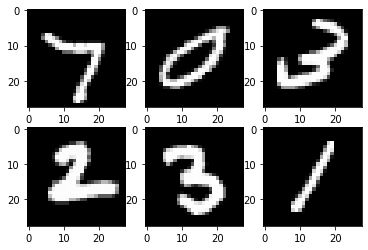

epoch 1/ 2, step  100/600, loss = 0.5101
epoch 1/ 2, step  200/600, loss = 0.3987
epoch 1/ 2, step  300/600, loss = 0.3490
epoch 1/ 2, step  400/600, loss = 0.2441
epoch 1/ 2, step  500/600, loss = 0.2226
epoch 1/ 2, step  600/600, loss = 0.1910
epoch 2/ 2, step  100/600, loss = 0.2192
epoch 2/ 2, step  200/600, loss = 0.1517
epoch 2/ 2, step  300/600, loss = 0.2688
epoch 2/ 2, step  400/600, loss = 0.1887
epoch 2/ 2, step  500/600, loss = 0.1849
epoch 2/ 2, step  600/600, loss = 0.2001
accuracy = 95.23


In [105]:
# Toy example. 

# MNIST
# DatLoader, Transformation
# Multilayer Neural Net, activiation function
# Loss and Optimzier 
# Traning Loop (batch training)
# Model evaluation
# GPU support.

import torch
import torch.nn as nn 
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# device configuration

device = torch.device('cpu')

# hyper parameters
input_size = 784 # 28* 28
hidden_size = 100
num_classes = 10 # 10 different digit
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST DATA

train_dataset = torchvision.datasets.MNIST(root = './data',train = True, transform = transforms.ToTensor(),download = True)
test_dataset = torchvision.datasets.MNIST(root = './data',train = False, transform = transforms.ToTensor(),download = True)

train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)

examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0],cmap= 'gray')
plt.show()

class NeuralNet(nn.Module):
    def __init__(self,input_size, hidden_size, num_classes):
        super(NeuralNet,self).__init__()
        self.l1 =nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self,x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # we use cross-entropy losss
        return out
    
model = NeuralNet(input_size, hidden_size, num_classes)

# loss and optimizer
 
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

# training loop

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        # 100,1,28,28
        # iunput size should be 100,784  # -1 by defaut, 28*28 is the second dimension  
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        
        # forward pass
        outputs = model(images)
        loss = criterion(outputs,labels)
        
        # backward pass
        optimizer.zero_grad()
        loss.backward()   # back-propogation
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1}/ {num_epochs}, step  {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

# Testing the performance

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        # return value,index 
        _, predictions = torch.max(outputs,1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
        
    acc = 100.0 * n_correct / n_samples
    print(f'accuracy = {acc}')

In [8]:
## CNN tutorail implementation : Imagine classification
# CNN clasify the imagines.

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device('cpu')

# Hyper-parmeters
num_epochs = 4
batch_size = 4
learning_rate = 0.001

# dataset has PILImagine image of range[0,1]. 
# We transform them to Tensors of normalized range [-1,1]

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

train_dataset = torchvision.datasets.CIFAR10(root = './data',train = True,download = False,transform = transform)
test_dataset = torchvision.datasets.CIFAR10(root = './data',train = False,download = False,transform = transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size ,shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size, shuffle = False)

# hardcode the class
classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet,self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)     # Dimension.
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,16*5*5)   # flat our tensor
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
         

model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # original shape: [4,3,32,32] = 4,3,1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size.
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1)% 2000 == 0:
            print( f'Epoch [{epoch+1}/{num_epochs}],Step [{i+1}/{n_total_steps}],Loss: {loss.item():.4f}')
    
print('Finished Training')

with torch.no_grad():
    
    n_correct = 0
    n_sample = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        # max returns(value, index)
        _, predicted = torch.max(outputs, 1)
        n_sample += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] +=1
            n_class_samples[label] +=1
            
    acc = 100.0 * n_correct / n_sample
    print(f'Accuracy of the network: {acc} %')

# This is not very good

Epoch [1/4],Step [2000/12500],Loss: 2.2710
Epoch [1/4],Step [4000/12500],Loss: 2.3052
Epoch [1/4],Step [6000/12500],Loss: 2.2900
Epoch [1/4],Step [8000/12500],Loss: 2.2324
Epoch [1/4],Step [10000/12500],Loss: 2.1602
Epoch [1/4],Step [12000/12500],Loss: 3.0008
Epoch [2/4],Step [2000/12500],Loss: 2.0717
Epoch [2/4],Step [4000/12500],Loss: 1.5620
Epoch [2/4],Step [6000/12500],Loss: 1.9453
Epoch [2/4],Step [8000/12500],Loss: 2.4279
Epoch [2/4],Step [10000/12500],Loss: 1.6791
Epoch [2/4],Step [12000/12500],Loss: 1.3932
Epoch [3/4],Step [2000/12500],Loss: 1.7579
Epoch [3/4],Step [4000/12500],Loss: 1.5374
Epoch [3/4],Step [6000/12500],Loss: 1.5899
Epoch [3/4],Step [8000/12500],Loss: 1.6400
Epoch [3/4],Step [10000/12500],Loss: 1.1611
Epoch [3/4],Step [12000/12500],Loss: 1.2393
Epoch [4/4],Step [2000/12500],Loss: 1.5876
Epoch [4/4],Step [4000/12500],Loss: 1.1922
Epoch [4/4],Step [6000/12500],Loss: 0.9158
Epoch [4/4],Step [8000/12500],Loss: 1.6364
Epoch [4/4],Step [10000/12500],Loss: 0.8428
Epoc

In [ ]:
# Transfirm learning. 
# ImageineFolder
# Scheduler
# Transfer learning


import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pylot as plt
import time 
import os 
import copy

device = torch.device('cpu')

mean = np.array([0.485,0.456,0.406])
std = np.array([0.229,0.224,0.225])

data_transforms = {'train': transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean,std)
]),
                  'val': transforms.Compose([
                      transforms.Resize(256),
                      transforms.CenterCrop(224),
                      transforms.ToTensor(),
                      transforms.Normalize(mean,std)
                  ])}


# import data
data_dir = 'data/hymenoptera_data'
sets = ['train','val']
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir,x),
                                         data_transforms[x]) for x in ['train','val']}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x],batch_size = 4,shuffle = True, num_workers = 0) for i in ['train','val']}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train','val']}
class_names = image_datsets['train'].classes
print(class_names)

def train_model(model,criterion, optimizer, scheduler, num_epochs = 25):
    since = time.time()
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs -1}')
        print('-'*10)
        
        # Each epoch has a training and a validation phase'
        for phase in ['train','val']:
            if phase = 'train':
                model.train()   # set model to training mode
            else:
                model.eval()    # Set model to evaluate mode
            
            running_loss = 0.0
            running_corrects = 0
            
        # Iterate over data. 
        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            # forward
            # track history in only in train
            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)
                
                # backward+ optimize only if in training phase
                
                if phase == 'train':
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()
                
                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds = labels.data)
                
            if phase == 'train':
                scheduler.step()
            
            epoch_loss = running_loss/ dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_size[phase]
            
            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
            
            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                
            print()
            
        
        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed//60:.0f}m {time_elapsed%60:.0f}s')
        
        # load besty model weights
        model.load_state_dict(best_model_wts)
        return model
    
    
model = models.resnet18(pretrained = True)
for param in model.parameters():
    param.requires_grad = False
      

num_ftrs = model.fc.in_features

model.fc = nn.Linear(num_ftrs, 2)          # we only have two classes
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001)

# scheduler 
# update the learning rate. 

step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size = 7, gamma = 0.1)      # every 7 epoch, our learning rate is multiply by gamma.
for epoch in range(100):
    train()   # optimizer.step()
    evaluate()
    scheduler.step()
    

model = train_model(model, criterion, optimizer, scheduler, num_epochs = 20)
                    
        